In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "3"
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Prepare Data

In [2]:
# Loading data
file_path = Path("./Resources/myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Remove target column and label response values
df_myopia.drop('MYOPIC', axis = 1)
labels = df_myopia['MYOPIC']

In [4]:
# Get the shape (number of columns and rows) of the DataFrame
df_myopia.shape

(618, 15)

In [5]:
# Scale data using StandardScaler()
myopia_scaled = StandardScaler().fit_transform(df_myopia)
print(myopia_scaled)

[[-4.20219106e-01 -1.36391690e+00 -8.92861464e-01 ...  9.87137728e-01
   1.00324150e+00  2.57480672e+00]
 [-4.20219106e-01 -3.08612235e-01 -1.71839800e-01 ...  9.87137728e-01
   1.00324150e+00 -3.88378667e-01]
 [-4.20219106e-01  6.04386289e-01 -9.97682023e-03 ... -1.01302987e+00
  -9.96768974e-01 -3.88378667e-01]
 ...
 [-4.20219106e-01  1.65169621e+00  6.52187361e-01 ...  9.87137728e-01
   1.00324150e+00 -3.88378667e-01]
 [-4.20219106e-01 -2.17472219e-01 -8.48716244e-01 ... -1.01302987e+00
  -9.96768974e-01 -3.88378667e-01]
 [-4.20219106e-01  1.58339808e-03 -3.48415042e-01 ...  9.87137728e-01
   1.00324150e+00 -3.88378667e-01]]


# Apply Dimensionality Reduction

In [6]:
# Initialize PCA model
pca = PCA(n_components=0.9)

In [7]:
# Get principal components for the myopia data.
myopia_pca = pca.fit_transform(myopia_scaled)

In [8]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(data=myopia_pca)
df_myopia_pca.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.782270,0.899383,-2.697392,0.533307,-3.138869,-1.514275,2.665827,-0.685834,1.259007,0.256176,1.837348
1,-0.618300,-1.586214,-0.635506,-0.310405,0.562274,0.589375,0.675577,0.329263,-0.816743,0.683726,-0.386646
2,-0.986590,-0.653197,1.410335,0.671055,-0.100877,0.014845,-0.535527,0.124015,0.826729,-0.091503,0.370604
3,0.351714,0.943830,-2.517241,-1.389667,-2.240394,0.125941,0.395271,-1.507727,1.722338,0.097634,-0.416667
4,-0.401488,-2.792502,0.639103,0.680018,0.235568,-0.868260,0.320928,-1.447538,-0.335757,-0.383506,0.317567


In [9]:
# Get the explained variance ratio
pca.explained_variance_ratio_


array([0.19869153, 0.14662762, 0.09951898, 0.07902771, 0.0710028 ,
       0.06555091, 0.06171931, 0.05989506, 0.05316865, 0.04913464,
       0.04465087])

In [10]:
# Get the shape of features after reduction
df_myopia_pca.shape

(618, 11)

In [11]:
# initialize t-SNE model
tsne = TSNE(learning_rate=500)

In [12]:
# reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca)

C:\Users\dmostacero\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [13]:
# print dimensions
tsne_features.shape

(618, 2)

In [14]:
# Prepare to plot the dataset

# The first column of transformed features
x = tsne_features[:,0]

# The second column of transformed features
y = tsne_features[:,1]


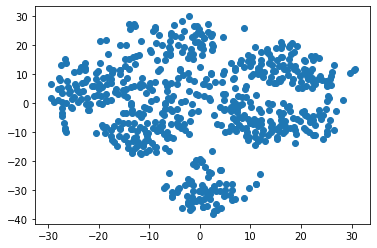

In [15]:
# Visualize the clusters
plt.scatter(x, y)
plt.show()

In [16]:
# Apply labels to response values
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

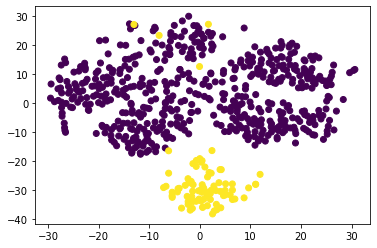

In [17]:
# Visualize the clusters with color
plt.scatter(x, y, c=labels)
plt.show()

# Perform a Cluster Analysis with K-means

In [18]:
# Finding the best value for _k_ using the Elbow Curve
inertia = []
k = list(range(1,11))
    

In [19]:
# calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

In [20]:
# create the elbow curve using hvPlot
elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,8611.719398
1,2,7453.292155
2,3,6686.361671
3,4,6205.342401
4,5,5910.515357


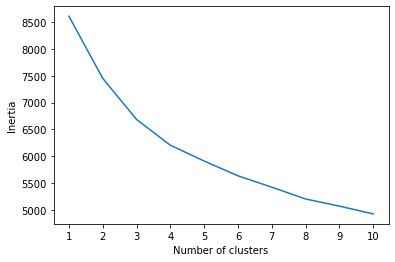

In [21]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Recommendation

### Based on the K-Means elbow curve, the patients can be grouped into 4 clusters, that's where you can see the las elbow. Also on the scatter plot you can easily see 4 separated groups.  